# Ch04  다양한 분류 알고리즘
# Ch04-1 로지스틱 회귀


In [41]:
# 데이터 준비하기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head() #상위 5개 행 출력

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [42]:
# 어떤 종류의 생선이 있는지 species 열에서 값 추출
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [43]:
# species 열을 target으로 만들고 나머지 5개 열은 입력 데이터로 사용하기
# 5개의 특성을 fish_input에 저장
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]

In [44]:
# 처음 5개 행 출력
fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [45]:
fish_target = fish['Species'] # species 열을 fish_target에 저장 
# 대괄호 1개로 감싸면 시리즈(!차원), 대괄호 2개로 감싸면 데이터프레임(2차원)

참고) Pandas 에서
* [] 1개로 감싸면 시리즈 (1차원)
    - 결과 타입 : pandas.Series
    - 모양 (shape) : (159,) 
* [[]] 는 데이터 프레임 (2차원)
    - 결과 타입 : pandas.DataFrame
    - 모양 : (159,1)
* [[]]인데 내용이 2개면 2차원에 열2개짜리 테이블
    - 결과 타입 : pandas.DataFrame
    - 모양 : (159,2)


In [46]:
from sklearn.model_selection import train_test_split
# 훈련 세트와 테스트 세트로 분할
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)


### 자주 쓰는 주요 함수들
* train_test_split()	
    - 데이터 분할
    - 데이터를 훈련용 / 테스트용으로 나눔
* KFold()	
    - 교차 검증 분할	
    - 데이터를 K개의 조각으로 나눠 교차 검증 수행
* StratifiedKFold()	
    -층화 교차 검증	
    - 클래스 비율(예: 남/녀, 합격/불합격)을 유지하면서 나눔
* cross_val_score()
    - 교차 검증 자동 수행	
    - 주어진 모델과 데이터로 여러 번 학습/평가 후 평균 점수 계산
* GridSearchCV()	
    - 하이퍼파라미터 튜닝	
    - 여러 파라미터 조합을 자동으로 시험해 최적값 탐색
* RandomizedSearchCV()	
    - 랜덤 하이퍼파라미터 튜닝	
    - 모든 조합이 아닌 일부를 무작위로 탐색해 빠르게 최적값 찾기

In [47]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input) # 훈련 세트로 표준화 기준 설정
train_scaled = ss.transform(train_input) # 훈련 세트 변환
test_scaled = ss.transform(test_input) # 테스트 세트 변환



다시 복습
* StandardScaler : 데이터의 scale을 맞추는 도구
    - 특성(feature)을 평균이 0, 표준편차가 1이 되도록 변환
    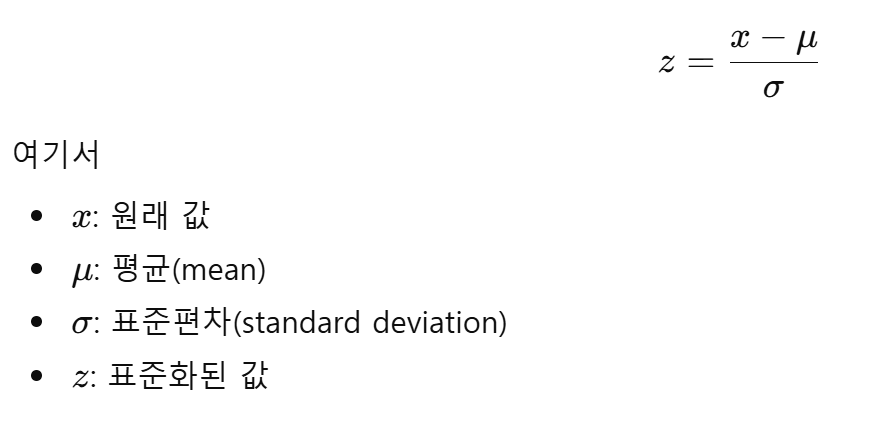

* fit() 
    - 하는 일 : 데이터의 평균과 표준편차를 계싼
    - 결과 : 내부에 저장

* transform() 
    - 하는 일 : 저장된 평균 표준편차를 이용해 데이터를 표준화 
    - 결과 : 새로운 값 반환

* fit_transform()
    - 하는 일 : 두 과정을 한 번에 수행
    - 주로 훈련 세트에 사용

## 1. K-최근접 이웃 분류기의 확률 예측


In [48]:
# K-최근접 이웃 분류기 훈련하기
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3) # 최근접 이웃 3개로
kn.fit(train_scaled, train_target) # 훈련 세트로 모델 훈련
print(kn.score(train_scaled, train_target)) # 훈련 세트로 모델 평가
print(kn.score(test_scaled, test_target)) # 테스트 세트로 모델 평가


0.8907563025210085
0.85


Target 데이터가 2개 이상인 것 = Multi-class Classification 다중분류
사이킷런에서 문자열로 된 타깃값을 그대로 사용할 수 있음
kn.classes 하면 알파벳 정렬되어 저장됨

In [49]:
print(kn.classes_) # 타깃값 확인

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


predict() 메서드는 단순히 숫자(예: 0, 1, 2...)가 아니라
사람이 알아볼 수 있는 타깃 이름(예: 'Perch', 'Smelt'...) 으로 결과를 보여준다.

즉,
모델이 내부적으로는 숫자 계산을 하지만,
출력할 때는 원래 타깃(문자열 레이블) 로 변환해 준다

In [50]:
print(kn.predict(test_scaled[:5])) # 처음 5개 샘플 예측

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


- predict()
    - 가장 가능성이 높은 클래스 이름 (또는 번호) 반환 
    - e.g. ['Perch', 'Smelt', 'Pike']
- predict_proba()
    - 각 클래스가 될 확률(probability)을 반환
    - e.g. [[0.1, 0.7, 0.2], [0.6, 0.1, 0.3], …]
- numpy 의  round()
    - 소수점 첫째 자리에서 반올림
    - decrimals 매개변수로 소수점 아래 자릿수 지정 가능

In [51]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) # 처음 5개 샘플의 클래스별 확률
np.round(proba, decimals=4) # 소수점 넷째 자리까지 반올림하여 출력

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

이 순서는 classes_ 속성에 저장된 타깃값의 알파벳 순서와 동일함
첫번째 열이 'Bream'에 해당하는 확률, 두번째 열이 'Parkki'에 해당하는 확률, 세번째 열이 'Perch'에 해당하는 확률, 네번째 열이 'Pike'에 해당하는 확률, 다섯번째 열이 'Roach'에 해당하는 확률, 여섯번째 열이 'Smelt'에 해당하는 확률
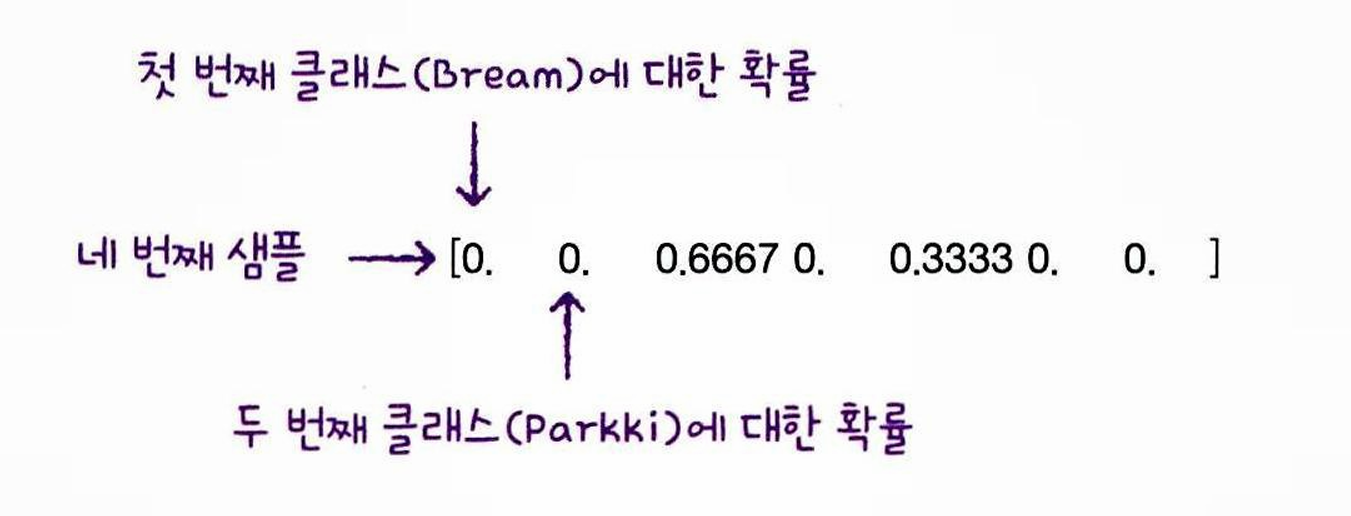

In [52]:
# 네번째 샘플의 최근접 이웃 3개의 타깃값 확인
distances, indexes = kn.kneighbors(test_scaled[3:4]) # 네번째 샘플의 최근접 이웃 3개
print(train_target.iloc[indexes[0]]) # 네번째 샘플의 최근접 이웃 3개의 타깃값

52     Roach
106    Perch
103    Perch
Name: Species, dtype: object


## 2. 로지스틱 회귀
회귀이지만 분류 모델. 
- 회귀 : 임의의 숫자를 맞추는 알고리즘
- 분류 : 여러개 클래스 중 하나를 맞추는 알고리즘 

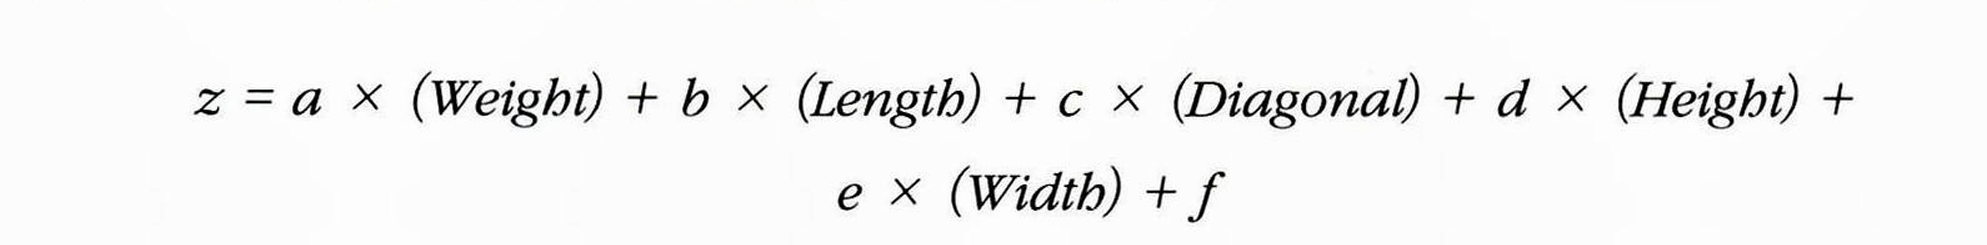
참과 거짓으로만 결과가 나올 때 사용. 
- 참 (1)
- 거짓 (0)

그러나 로지스틱 회귀를 확률로 사용해야하기 때문에 0~1 사이의 값이 되어야함.
따라서, z가 아주 큰 음수일 때 0이 되고, 아주 큰 양수일 때 1이 되도록 최소값과 최대값을 만들어주는 방법이
### 2.1. 시그모이드 함수 (로지스틱 함수)
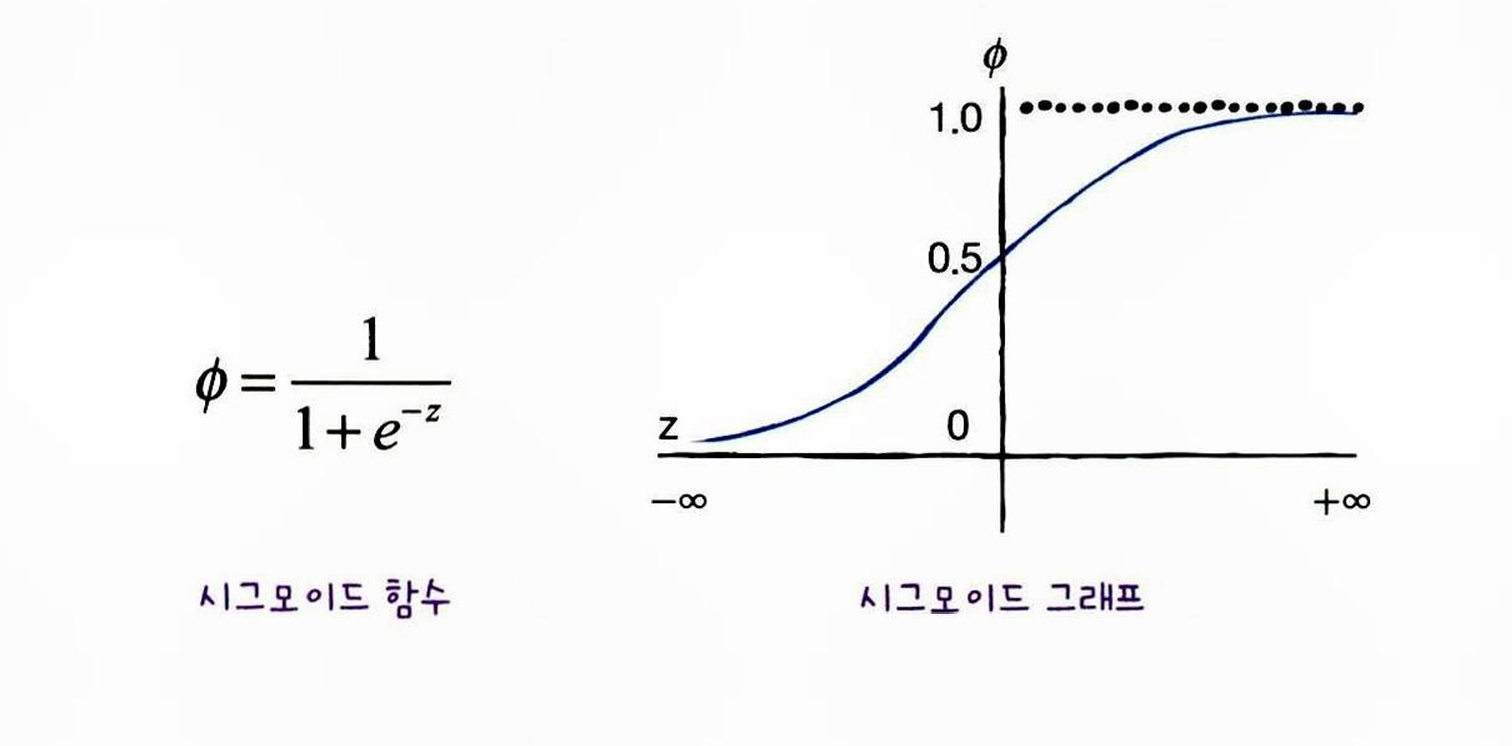

- 시그모이드 함수 그리는 방법 Numpy 이용

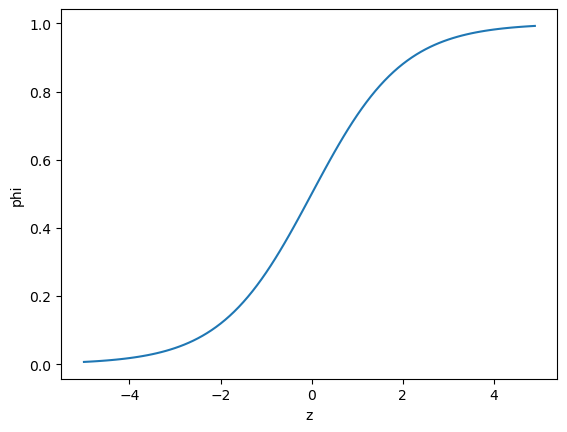

In [53]:
#시그모이드 함수 그리기 
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1) # -5부터 5까지 0.1 간격의 배열 생성
phi = 1 / (1 + np.exp(-z)) # 시그모이드 함수 계산
plt.plot(z, phi) # 그래프 그리기
plt.xlabel('z') # x축 이름
plt.ylabel('phi') # y축 이름
plt.show() # 그래프 출력

이진 분류
- 시그모이드 함수 출력 >0.5 : 양성 클래스
- 시그모이드 함수 출력 <0.5 : 음성 클래스

## 2.2 로지스틱 회귀로 이진 분류 수행하기

넘파이 배열은 True, False로 값을 전달하여 행을 선택할 수 있음.
= **불리언 인덱싱 (Boolean indexing)**



In [54]:
# 이진 분류로 시그모이드 함수 출력
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]]) # 불리언 인덱싱 예시. A와 C 선택


['A' 'C']


In [55]:
# Bream과 Smelt만 선택하여 이진 분류 수행
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # 타깃이 도미인것만 true로 OR 타깃이 빙어인것만 true로 
train_bream_smelt = train_scaled[bream_smelt_indexes] #train_scaled (표준화한 데이터 셋)에서 bream_smelt_indexes가 True인 행만 선택
traget_bream_smelt = train_target[bream_smelt_indexes] #train_target (타깃값)에서 bream_smelt_indexes가 True인 행만 선택

In [56]:
# 로지스틱 회귀 모델을 훈련
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 불러오기
lr = LogisticRegression() # 모델 객체 생성
lr.fit(train_bream_smelt, traget_bream_smelt) # 도미와 빙어 데이터로 모델 훈련

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [57]:
print(lr.predict(train_bream_smelt[:5])) # 처음 5개 샘플 예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [58]:
print(lr.predict_proba(train_bream_smelt[:5])) # 처음 5개 샘플의 클래스별 확률

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


- 첫 번째 열 = 음성 클래스 (0)에 대한 확률
- 두 번째 열 = 양성 클래스 (1)에 대한 확률
- bream 과 smelt 중에는 알파벳 순으로 bream이 양성 클래스일 것.
(음성 / 양성은 그저 순서상의 표기일 뿐 다른 의미는 없음)

In [59]:
print(lr.classes_) # 클래스 확인

['Bream' 'Smelt']


In [60]:
print(lr.coef_, lr.intercept_) # 계수와 절편 출력

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


따라서, 위 계수와 절편을 이용한 로지스틱 회귀 모델이 학습한 방정식은
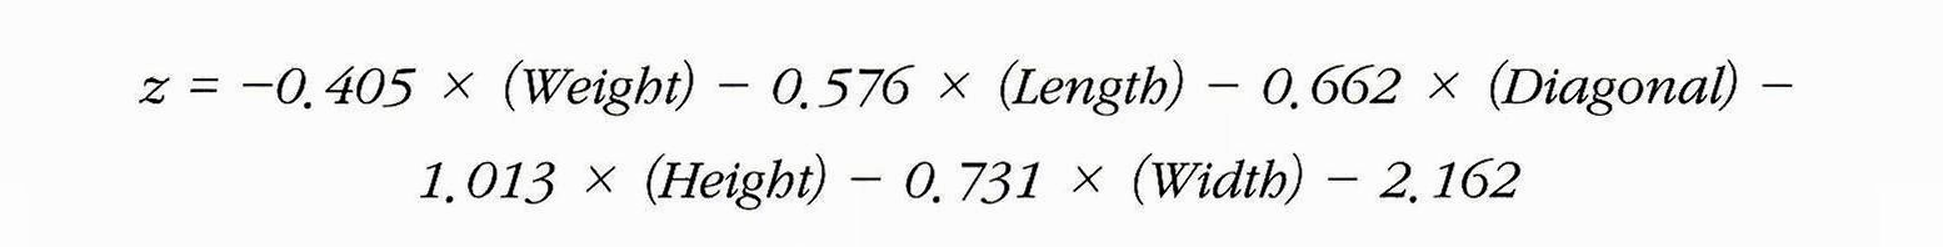

- 계수 coef는 입력 데이터의 특성 개수와 동일. 
    - 모델에 입력된 데이터가 5개니까, 계수(기울기)도 5개
- 순서는 입력 데이터의 열 순서와 동일
    - 모델에 입력할 때, weight, length, diagonal, height, width로 입력했으므로, 계수도 순서대로.

In [61]:
decisions = lr.decision_function(train_bream_smelt[:5]) # 처음 5개 샘플의 결정 함수 값 계산
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


###  Decisions 란?
decision_function()은 로지스틱 회귀에서 모델이 계산한 "결정 함수 값(= z값)"을 의미.
- 결정 함수 값 = z 값 = 로짓 (logit)

**<로지스틱 회귀의 수식 구조>**
로지스틱 회귀는 선형 회귀처럼, 입력값에 가중치를 곱한 뒤 시그모이드 함수를 씌워 확률로 바꿈.

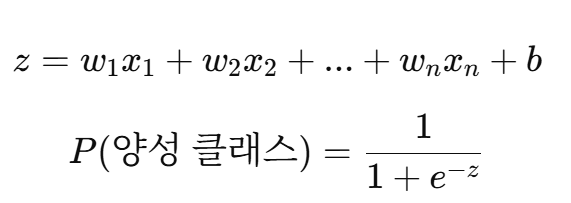

z 가 결정 함수 decision function

**<해석 방법>**
- z < 0 : 음성 클래스 쪽에 가깝다 
- z > 0 : 양성 클래스 쪽에 가깝다
- z = 0 : 두 클래스 사이의 경계 (확률 0.5)

이 z 값을 시그모이드 함수에 통과 시키면 **확률**

### predict_proba()를 보면 이미 양성 클래스의 확률이 나와있는데 왜 decision_function()사용?
1. predict_proba()는 이미 시그모이드 변환을 거친 "확률" 형태의 결과
- 예를 들어 한 샘플이 z = -5.0이라면, P=1/(1+e^-(-5.0)) = 0.0067이므로 거의 도미라고 알 수 있음.

2. 그러나, decision_function()은 확률이 만들어지기 전 단계. z값 (로짓) 자체를 반환
- z = w1x1 + w2x2 + ... + b
- 모델의 확신 정도를  더 잘 볼 수 있음
- 예를 들어 
    - 샘플 A의 z값(decision)은 -0.2, 시그모이드 함수 (predict_proba) 는 0.45
    - 샘플 B의 z값은 -5.0, 시그모이드 함수 는 0.0067 
    - 두 샘플 모두 음성 클래스로 보이나, A는 경계 근처이고 B는 확실히 음성 클래스 인 것을 확인할 수 잇음. 


* predict_proba() 
    - 반환 값 : 0 ~ 1 
    - 용도 : 이 샘플이 ㅇㅇ 일 확률이 몇%인가?
    - 이 물고기가 빙어일 확률이 97%예요.

* decision_function()
    - 반환 값 : -무한 ~ + 무한
    - 모델이 얼마나 확신하는가? 경계로부터 얼마나 떨어져 있는가?
    - 이 물고기는 모델의 기준선에서 오른쪽으로 z=3.6만큼 멀리 떨어져 있어요. (→ 확신 강함)

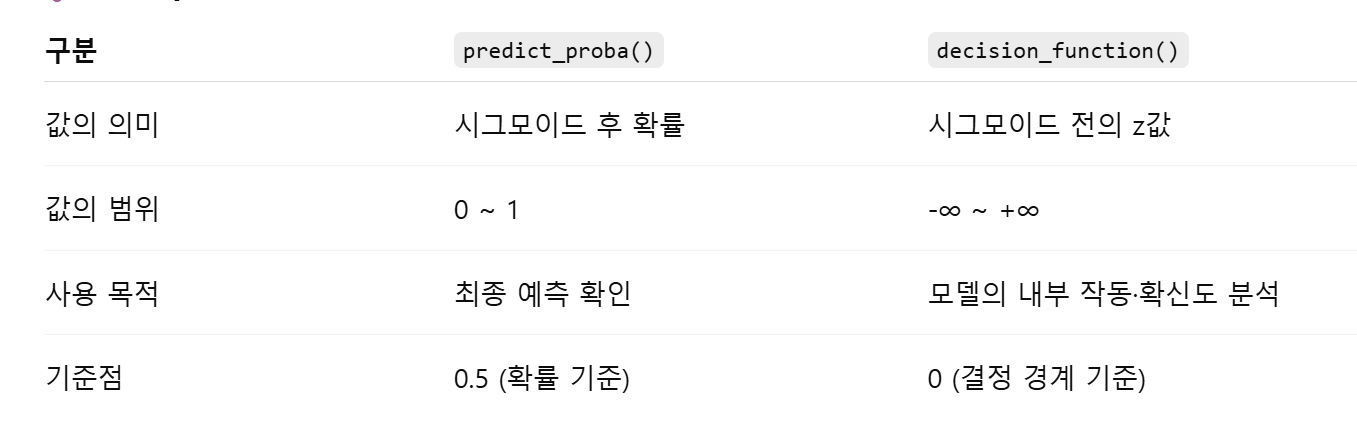
### 확률로 변경하는 함수 expit() @사이파이 scipy 라이브러리



In [62]:
from scipy.special import expit # 시그모이드 함수 불러오기
print(expit(decisions)) # 결정 함수 값에 시그모이드 함수 적용하여 확률 계산
#

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


decision_function 의 두번째 열과 동일한 값을 확인할 수 있음.
- 음성 클래스 확률 (첫번째 열) = 1 - expit(z)
- 양성 클래스 확률 (두번째 열) = expit(z)

- predict_proba()의 첫 번째 열 = 1 - expit(decision_function())
- predict_proba()의 두 번째 열 = expit(decision_function())
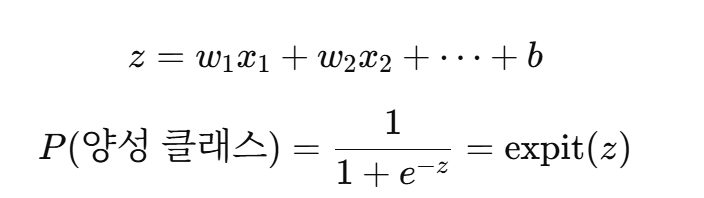

### 로지스틱 회귀 총정리
1. 입력값(특성)과 가중치의 선형 결합 계산
선형 회귀에서 출발한다.
- z = ax1 + bx2 + ... + y
- z = decision_function() 값

2. 시그모이드 함수를 적용하여 확률로 변환한다. 
z 값은 아무리 커도 확률이 아님. (0~1이 아님)
- scipy.special.expit()으로 z값을 확률로 변환
- expit(z) = 양성 클래스의 확률 = lr.predict_proba()[:,1]

3. 두 클래스의 확률 계산 by binary classification
- 양성 클래스 확률은 expit(z), 음성 클래스 확률은 1-expit(z)
- 이 두개를 붙이면
    - np.column_stack((negativ, positive)) = lr.predict_proba(x)

4. 확률을 이용한 최종 예측
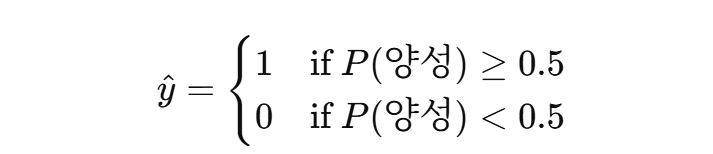
- scikit-learn에서는 lr.predict(x) 가 이 역할을 함 
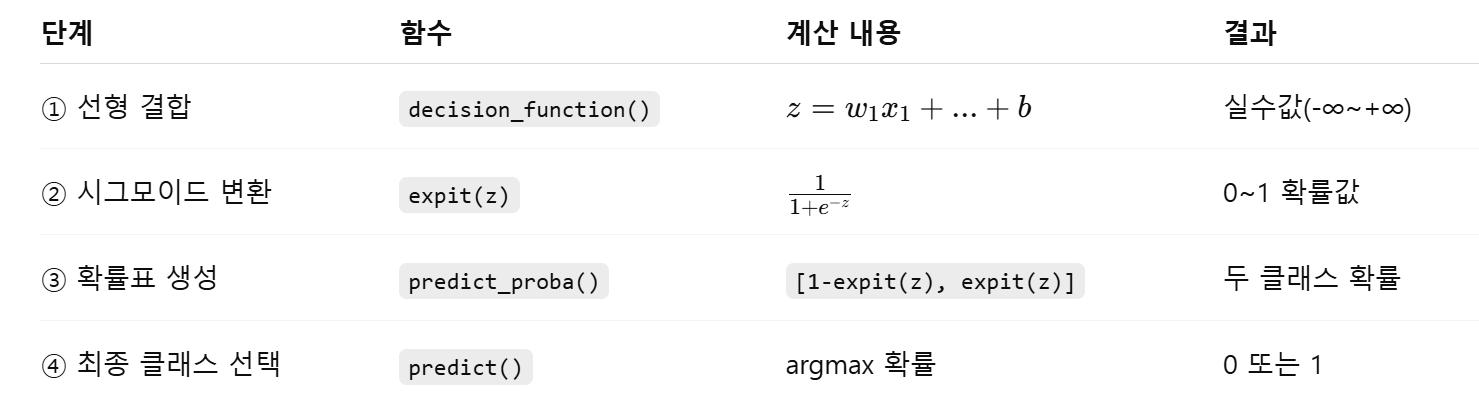

## 2.3 로지스틱 회귀로 다중 분류 수행하기
위에까지는 이진 분류
이제 7개의 생선을 분류해보기

- LogisticREgression 클래스는 기본적으로 반복적인 알고리즘을 사용.
    - max_iter 매개변수로 반복 횟수 지정 (기본값 = 100)
    - >> 반복 횟수가 부족하다는 경고가 발생하면 1,000으로 늘리기.

- LogisticRegression 은 기본적으로 릿지 회귀처럼 계수의 제곱을 규제함.
    - aka L2규제
        - 릿지에서는 alpha 매개변수로 커지면 규제가 커지게 햇음
    - LR에서 매개변수는 C 
    - C값이 커지면 규제가 작아지고, C값이 작아지면 규제가 커짐. 
    - C의 기본값은 1
    



In [63]:
#LogisticRegression 클래스로 다중 분류 모델 훈련
lr = LogisticRegression(C=20, max_iter=1000) # 규제 강도 C를 20으로, 최대 반복 횟수 1000으로 설정
lr.fit(train_scaled, train_target) # 전체 훈련 세트로 모델 훈련
print(lr.score(train_scaled, train_target)) # 훈련 세트 점수 출력
print(lr.score(test_scaled, test_target)) # 테스트 세트 점수 출력

0.9327731092436975
0.925


In [64]:
# 테스트 세트의 처음 5개 샘플의 클래스별 예측 출력
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [65]:
#테스트 세트의 처음 5개 샘플의 클래스별 확률 출력
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

#샘플 5개에서 7개 생선에 대한 확률 계산 
#첫번째 샘플의 세번째 열의 확률이 가장 높음

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [66]:
#각각 어느 클래스에 대한 확률인지 확인
print(lr.classes_)
#

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


첫번째 샘플의 가장 높은 값 = 세번째 열 :  'Perch'
두번째 샘플의 가장 높은 값 = 여섯번째 열 : 'Smelt'

In [67]:
#다중분류를 선형 방정식으로 만들어보기.
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


* coef의 열은 5개 = 5개의 특성
* coef의 행은 7개, intercept의 행도 7개 = z 값을 7 개 계싼한다는 의미

이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1사이의 값으로 변환
다중 분류에서는 **소프트맥스 softmax** 함수를 사용하여 여러개의 z 값을 확률로 변환

### softmax 함수
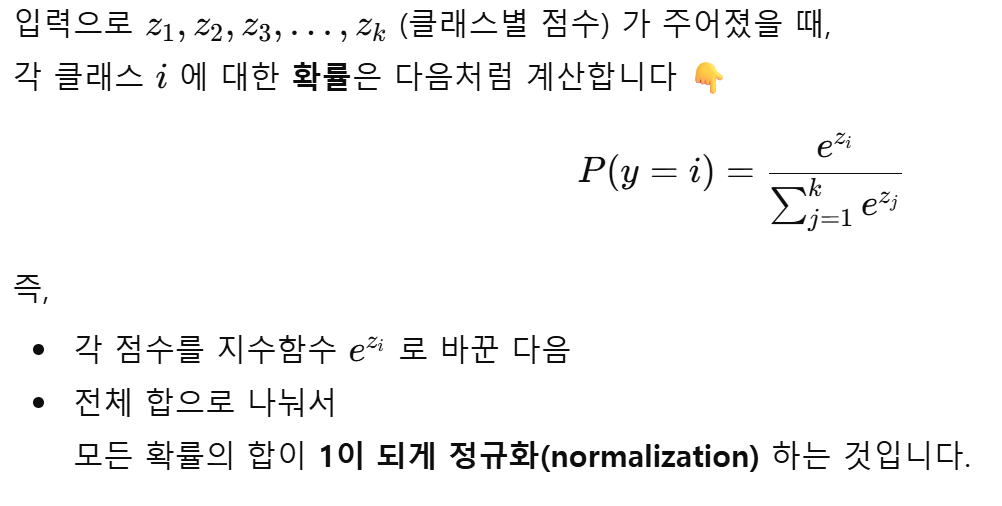
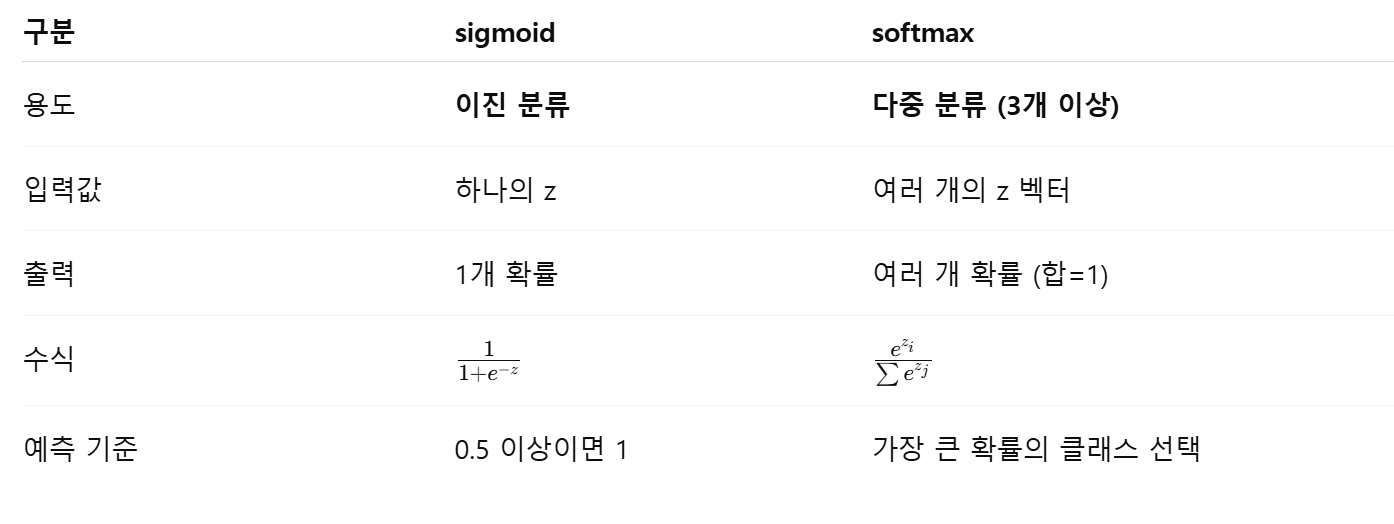

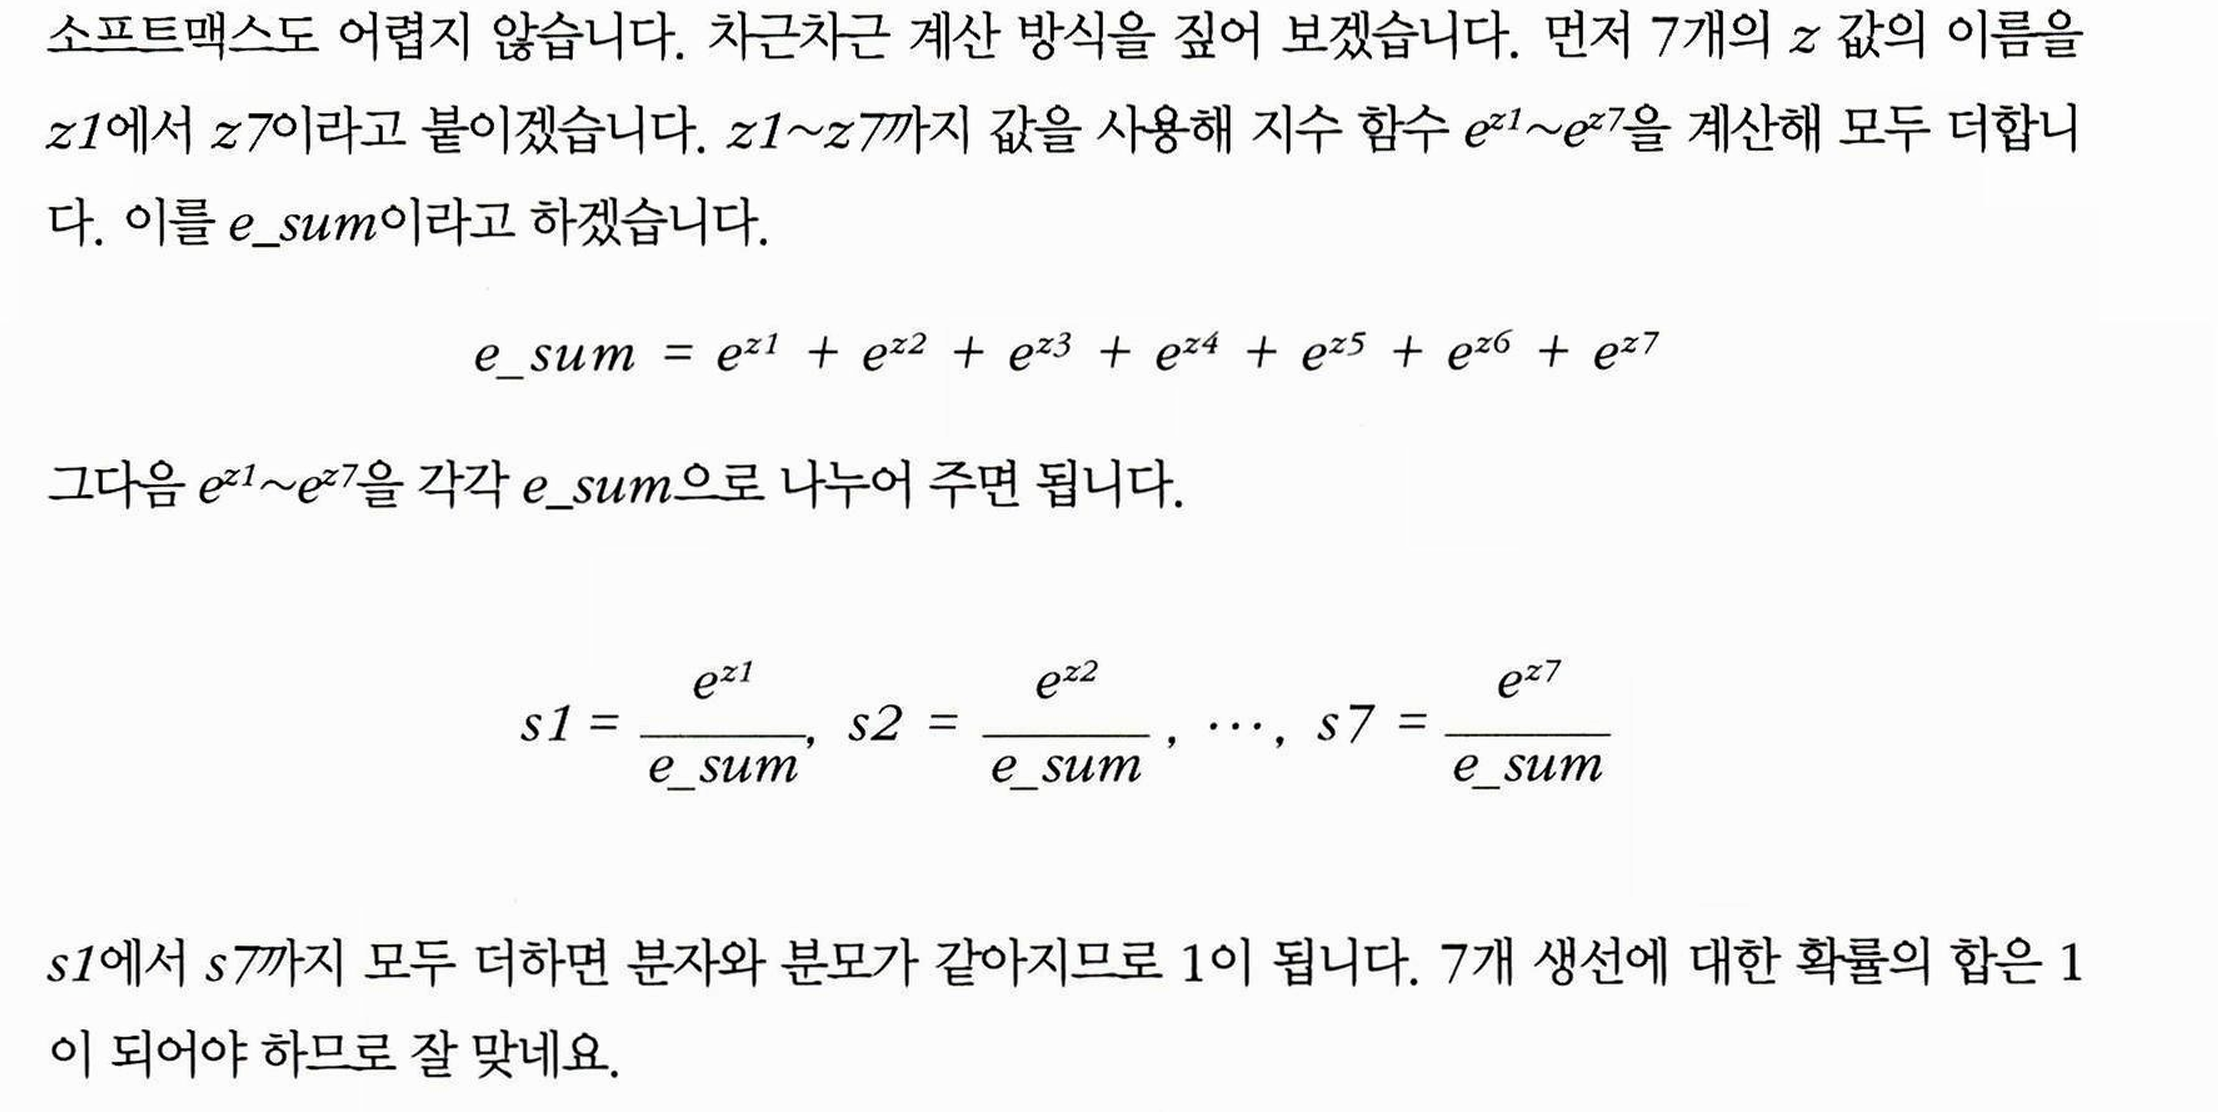

* 로지스틱 회귀(LogisticRegression)
→ multi_class='multinomial' 옵션을 주면 softmax 사용
→ 기본은 OvR(one-vs-rest), 즉 이진 시그모이드 방식 여러 개

* 신경망(딥러닝)
→ 분류 마지막 층(예: Dense(3, activation='softmax'))
→ 각 클래스의 확률 출력

In [68]:
#decision_function을 이용하여 z1 ~ z7 값 계산하기
decisions = lr.decision_function(test_scaled[:5])
print(np.round(decisions, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [69]:
#scipy.special의 softmax 함수로 다중 분류 확률 계산하기
from scipy.special import softmax
proba = softmax(decisions, axis=1) # axis=1은 행 방향. 즉 각 샘플에 대해 소프트 맥스를 계산하라. 지정안하면 배열 전체에 대해 계산
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
